# Test Bandit Distributions

In [1]:
from bandit import KArmedBandit
import matplotlib.pyplot as plt

In [2]:
bandit = KArmedBandit(k=10, seed=42)
print(bandit)

KArmedBandit(k=10, means=[ 1.1  -0.24  1.43  0.79 -1.62  1.9   1.04  1.14 -1.49 -0.2 ], stds=[0.87 1.43 1.14 1.32 0.94 0.73 1.05 0.56 1.33 1.13])


In [3]:
# Sample from arm 3
reward = bandit.pull(3)
print("Arm 3 reward:", reward)

# Best arm based on mean
print("Optimal arm:", bandit.optimal_arm())

Arm 3 reward: 0.5449432780012681
Optimal arm: 5


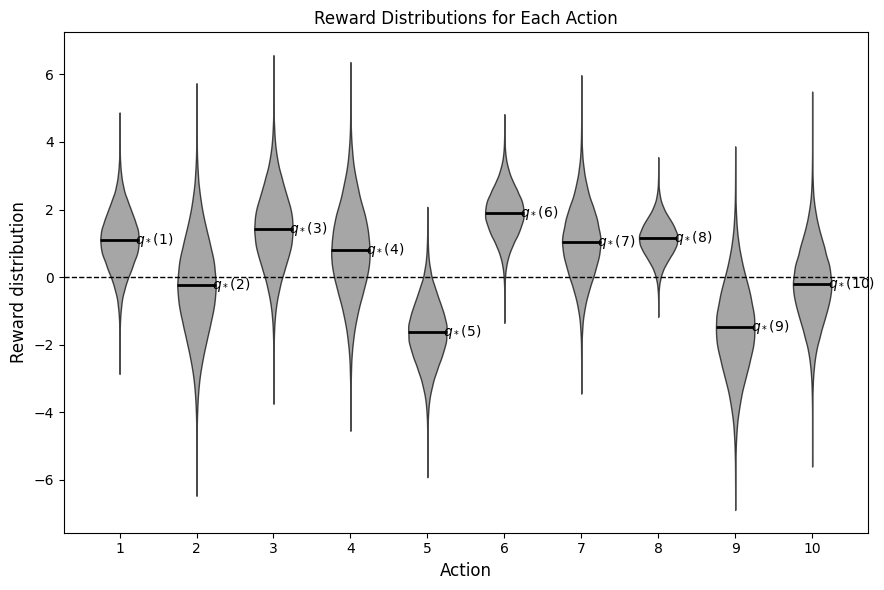

In [6]:
bandit.plot_distributions(100000)

# Step and test agents

In [7]:
from bandit import KArmedBandit, EpsilonGreedyAgent, UCBAgent, GradientBanditAgent, BanditSimulator

In [8]:
agent_configs = [
    # ε-Greedy (moderate ε)
    {"type": "epsilon", "k": 10, "epsilon": 0.3},  # simple fixed epsilon
    
    # ε-Greedy (small ε)
    {"type": "epsilon", "k": 10, "epsilon": 0.01},  # simple fixed epsilon
    
    # ε-Greedy (optimistic initialization)
    {"type": "epsilon", "k": 10, "epsilon": 0.3, "initial_value": 5.0},  # Q_init high
    
    # ε-Greedy (constant α)
    {"type": "epsilon", "k": 10, "epsilon": 0.3, "step_size": 0.1},  # fixed step size
    
    # ε-Greedy with exponential decay
    {"type": "epsilon", "k": 10, "epsilon": 0.6, "decay_type": "exponential", "decay_rate": 0.005, "epsilon_min": 0.01},
    
    # Upper Confidence Bound (UCB)
    {"type": "ucb", "k": 10, "c": 2.0},  # high exploration
    
    # Gradient Bandit
    {"type": "gradient", "k": 10, "step_size": 0.1, "use_baseline": True}
]

# Instantiate agents dynamically
agents = []
for cfg in agent_configs:
    if cfg["type"] == "epsilon":
        agents.append(EpsilonGreedyAgent(**{k:v for k,v in cfg.items() if k!="type"}))
    elif cfg["type"] == "ucb":
        agents.append(UCBAgent(**{k:v for k,v in cfg.items() if k!="type"}))
    elif cfg["type"] == "gradient":
        agents.append(GradientBanditAgent(**{k:v for k,v in cfg.items() if k!="type"}))

In [9]:
agents

[EpsilonGreedyAgent(k=10, ε=0.3),
 EpsilonGreedyAgent(k=10, ε=0.01),
 EpsilonGreedyAgent(k=10, ε=0.3, init_Q=5.0),
 EpsilonGreedyAgent(k=10, ε=0.3, α=0.1),
 EpsilonGreedyAgent(k=10, ε=0.6, decay=exponential, decay_rate=0.005),
 UCBAgent(k=10, c=2.0),
 GradientBanditAgent(k=10, α=0.1, baseline=True)]

In [10]:
sim = BanditSimulator(KArmedBandit, agents, runs=200, steps=1000)

In [11]:
rewards, optimal = sim.run()

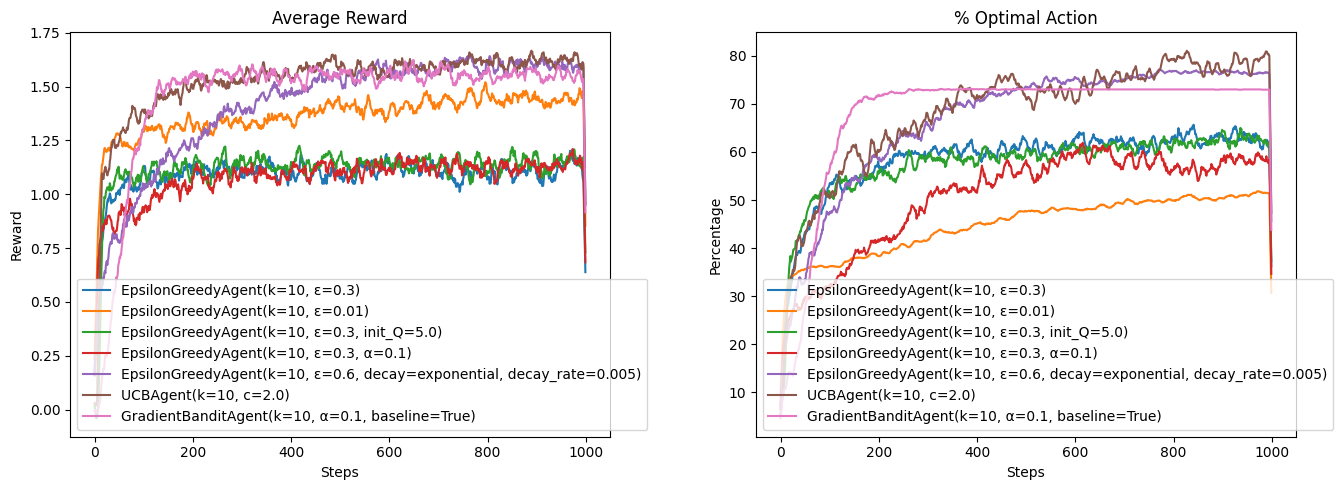

In [12]:
sim.plot_results(agents, rewards, optimal)